In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [82]:
train=pd.read_csv('train.csv')
train.shape

(177024, 508)

In [83]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

In [84]:
missing_values = train.isnull().sum()

print(missing_values[missing_values > 0])  # Show only columns with missing values

bg-5:55           27254
bg-5:50           18491
bg-5:45           13660
bg-5:40           27258
bg-5:35           18770
                  ...  
activity-0:20    174270
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
Length: 504, dtype: int64


In [85]:
train.isnull().sum().sum()

40294794

In [86]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
high_missing = missing_info[missing_info['Percentage'] > 20]
print(high_missing)

               Missing Values  Percentage
carbs-5:55             174453   98.547655
carbs-5:50             174485   98.565731
carbs-5:45             174483   98.564601
carbs-5:40             174453   98.547655
carbs-5:35             174483   98.564601
...                       ...         ...
activity-0:20          174270   98.444279
activity-0:15          174293   98.457271
activity-0:10          174287   98.453882
activity-0:05          174271   98.444844
activity-0:00          174287   98.453882

[342 rows x 2 columns]


In [87]:
count_train = train.p_num.value_counts().sort_index()
count_train

p_num
p01     8459
p02    25872
p03    26028
p04    24686
p05     8288
p06     8383
p10    25454
p11    24555
p12    25299
Name: count, dtype: int64

In [88]:
uniq_cols=[]
for i in train.columns:
    col = i.split('-')[0]
    uniq_cols.append(col)
uniq_cols = np.unique(uniq_cols)
print(uniq_cols)

['activity' 'bg' 'bg+1:00' 'cals' 'carbs' 'hr' 'id' 'insulin' 'p_num'
 'steps' 'time']


In [89]:
uniq_cols

array(['activity', 'bg', 'bg+1:00', 'cals', 'carbs', 'hr', 'id',
       'insulin', 'p_num', 'steps', 'time'], dtype='<U8')

In [90]:
## this function will make a separate df for each col see the result to understand
def df_of_col (train,col):
    df = pd.DataFrame()
    for i in train.columns:
        if (i.split('-')[0] ==col) & (i  not in ['hr','bg+1:00','id','p_num']):
            df[i] = train[i]
    return df

In [91]:
activity = df_of_col(train,uniq_cols[0])
bg =  df_of_col(train,uniq_cols[1])
cals =  df_of_col(train,uniq_cols[3])
carbs =  df_of_col(train,uniq_cols[4])
insulin =  df_of_col(train,'insulin')
steps =  df_of_col(train,uniq_cols[-2])
time =  df_of_col(train,uniq_cols[-1])

## Check out activity 

In [92]:
activity_missing_percentage = activity.isnull().mean() * 100
print(activity_missing_percentage)
print("------------------------------------------------------------------------------")
print(f'mean percentage for missing values is {np.mean(activity_missing_percentage)}')
print(f'on average this much values are missing for activity columns : {np.mean(activity.isnull().sum())}')

activity-5:55    98.452187
activity-5:50    98.453317
activity-5:45    98.462920
activity-5:40    98.455577
activity-5:35    98.455577
                   ...    
activity-0:20    98.444279
activity-0:15    98.457271
activity-0:10    98.453882
activity-0:05    98.444844
activity-0:00    98.453882
Length: 72, dtype: float64
------------------------------------------------------------------------------
mean percentage for missing values is 98.45232065206476
on average this much values are missing for activity columns : 174284.23611111112


### Based on the results of missing data on activity it would be best to drop the columns

In [93]:
from tabulate import tabulate
features = pd.Series(['bg','cals','carbs','insulin','steps'])
fe_list = [bg,cals,carbs,insulin,steps]
mean_nulls = [np.mean(i.isnull().sum()) for i in fe_list]
mean_percents =[np.mean(i.isnull().mean()*100) for i in fe_list]
table_data = list(zip(features,mean_nulls,mean_percents))
headers = ['Feature','Avg_nulls','Avg_null_percents']
table = tabulate(table_data,headers,tablefmt='pretty')
print(table)

+---------+--------------------+--------------------+
| Feature |     Avg_nulls      | Avg_null_percents  |
+---------+--------------------+--------------------+
|   bg    | 19051.166666666668 | 10.761911755844782 |
|  cals   | 35544.541666666664 | 20.07893939051579  |
|  carbs  | 174470.19444444444 |  98.557367613682   |
| insulin |       9410.5       | 5.315945860448301  |
|  steps  | 95374.08333333333  | 53.87635763135696  |
+---------+--------------------+--------------------+


### From the table above we can also see that carbs should be dropped too

# further analysis

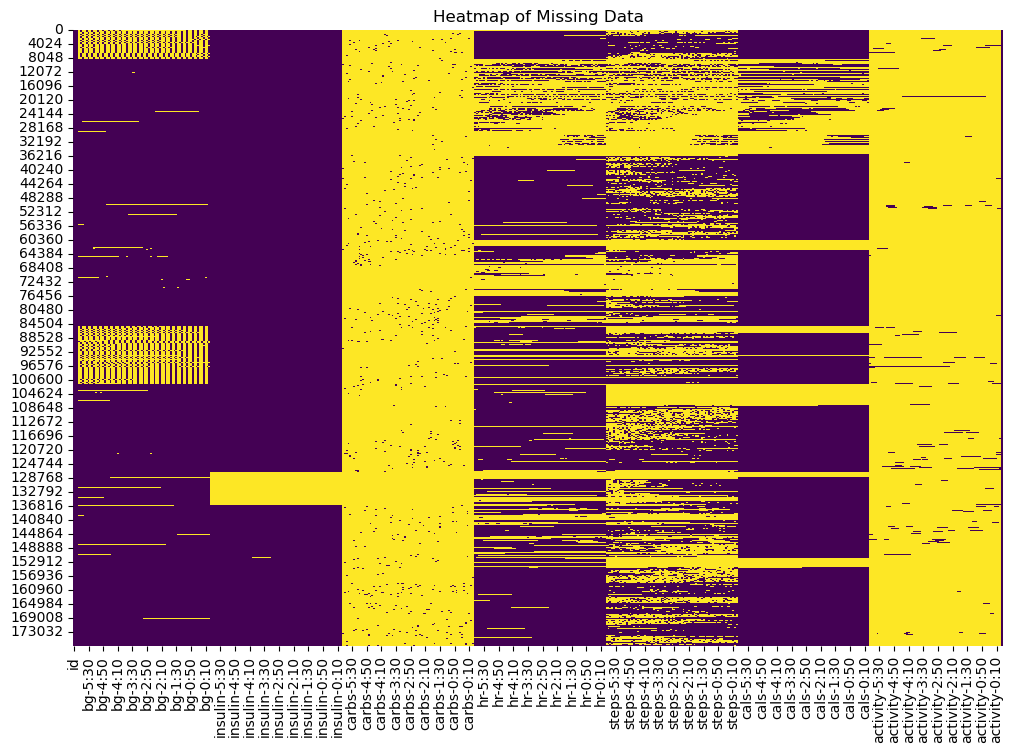

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


### Yellow (or light-colored) regions indicate missing values.
### Purple (or dark-colored) regions indicate non-missing (present) values.

# Compute and visualize correlations (for numeric features only)

In [112]:
# corr_matrix = train.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

# check for duplicates

In [101]:
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if necessary
train = train.drop_duplicates()


Number of duplicate rows: 0


In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
def analyze_missing_data_by_patient(df, patient_col):
 
    # Group by patient and calculate the percentage of missing data
    patient_missing_summary = (
        df.groupby(patient_col)
        .apply(lambda group: group.isnull().mean().mean() * 100)  # Average missing percentage across all columns
        .reset_index()
    )
    patient_missing_summary.columns = [patient_col, 'Missing Percentage']
    return patient_missing_summary


In [108]:
def plot_missing_data_by_patient(missing_summary, patient_col):
  
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_summary, x=patient_col, y='Missing Percentage', palette='viridis')
    plt.title('Percentage of Missing Data by Patient')
    plt.xticks(rotation=90)
    plt.ylabel('Missing Data (%)')
    plt.xlabel('Patient ID')
    plt.show()


In [110]:
def filter_patients(df, patient_col, threshold=50):
    missing_summary = analyze_missing_data_by_patient(df, patient_col)
    keep_patients = missing_summary[missing_summary['Missing Percentage'] <= threshold][patient_col].tolist()
    drop_patients = missing_summary[missing_summary['Missing Percentage'] > threshold][patient_col].tolist()
    return keep_patients, drop_patients


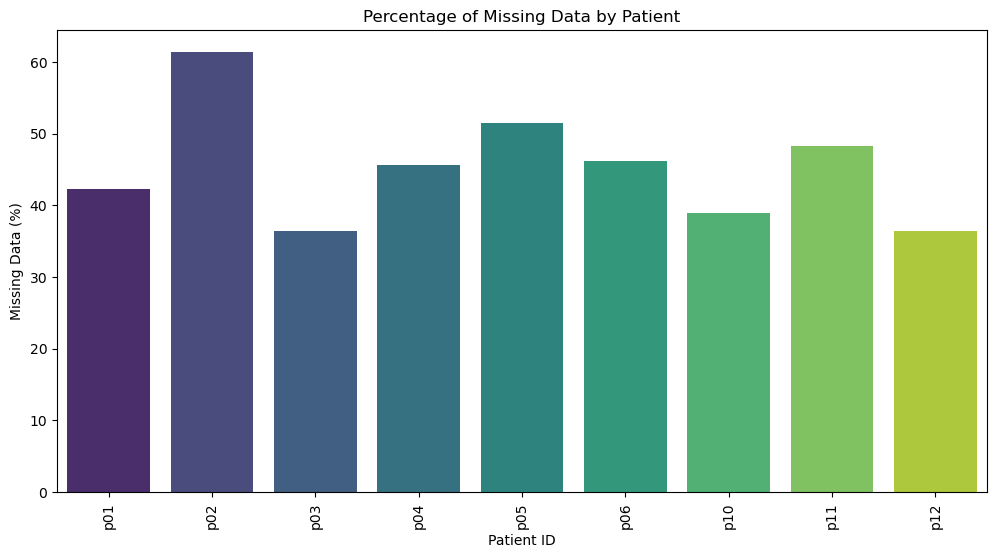

Patients to KEEP: ['p01', 'p03', 'p04', 'p06', 'p10', 'p11', 'p12']
Patients to DROP: ['p02', 'p05']


In [114]:
# Analyze missing data by patient
patient_missing_summary = analyze_missing_data_by_patient(train, 'p_num')

# Plot the missing data by patient
plot_missing_data_by_patient(patient_missing_summary, 'p_num')

# Filter patients based on a threshold (e.g., 50% missing data)
keep_patients, drop_patients = filter_patients(train, 'p_num', threshold=50)

# Display the patients to keep and drop
print(f"Patients to KEEP: {keep_patients}")
print(f"Patients to DROP: {drop_patients}")

# Filter the dataset to keep only the selected patients
filtered_train = train[train['p_num'].isin(keep_patients)]

In [115]:
# Replace 'patient_id' with the name of the column representing patient identifiers
row_counts = train.groupby('p_num').size()

# Convert to DataFrame for easier visualization
row_counts_df = row_counts.reset_index()
row_counts_df.columns = ['p_num', 'row_count']

# Display the number of rows per patient
print(row_counts_df)


  p_num  row_count
0   p01       8459
1   p02      25872
2   p03      26028
3   p04      24686
4   p05       8288
5   p06       8383
6   p10      25454
7   p11      24555
8   p12      25299


In [117]:
# Set a threshold for acceptable row counts
min_rows = 8000  # Minimum acceptable rows
max_rows = 20000  # Maximum acceptable rows

filtered_train = train[train['p_num'].isin(row_counts_df[
    (row_counts_df['row_count'] >= min_rows) & 
    (row_counts_df['row_count'] <= max_rows)
]['p_num'])]

print(filtered_train.groupby('p_num').size())  # Check remaining patients


p_num
p01    8459
p05    8288
p06    8383
dtype: int64


In [118]:
# Find the minimum row count across patients
min_rows = train.groupby('p_num').size().min()

# Truncate each patient's data to the minimum row count
equal_rows = train.groupby('p_num').apply(lambda x: x.head(min_rows)).reset_index(drop=True)

# Verify the rows are consistent across patients
row_counts = equal_rows.groupby('p_num').size()
print(row_counts)

# Check the distribution of rows to ensure uniformity
assert row_counts.nunique() == 1, "Not all patients have the same number of rows!"

# Save the processed dataset for modeling
equal_rows.to_csv('processed_dataset.csv', index=False)


p_num
p01    8288
p02    8288
p03    8288
p04    8288
p05    8288
p06    8288
p10    8288
p11    8288
p12    8288
dtype: int64
